## 多重继承

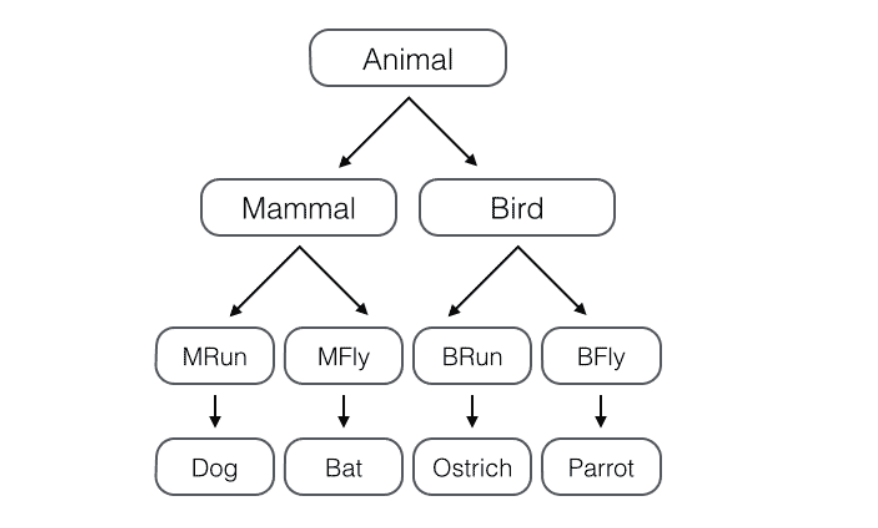

In [4]:
#动物类
class Animal(object):
    pass

In [5]:
#哺乳类
class Mammal(Animal):
    pass

#鸟类
class Bird(Animal):
    pass

In [11]:
#狗
class Dog(Mammal,Runnable):
    pass

#蝙蝠
class Bat(Mammal,Flyable):
    pass

#鹦鹉
class Parrot(Mammal):
    pass

#鸵鸟
class Ostrich(Mammal):
    pass

In [10]:
#能跑的
class Runnable(object):
    def run(self):
        print('Running...')
        
#能飞的
class Flyable(object):
    def fly(self):
        print('Flying...')

MixIn的目的就是给一个类增加多个功能，考虑多重继承。

## 定制类

### `__str__`

In [18]:
class Student(object):
    def __init__(self,name):
        self.name = name
        
    def __str__(self):
        return 'Student object (name:%s)' % self.name
    
    __repr__ = __str__

In [19]:
print(Student('Bob'))

Student object (name:Bob)


In [20]:
s = Student('James')
s

Student object (name:James)

`__str__()`返回用户看到的字符串，而`__repr__()`返回程序开发者看到的字符串，也就是说，`__repr__()`是为调试服务的。


### `__iter__`

如果一个类想被用于for...in循环，类似list或tuple，必须实现一个__iter__()方法，返回一个迭代对象。

斐波那契数列

In [5]:
class Fib(object):
    def __init__(self):
        self.a,self.b = 0,1#初始化两个计数器a,b
        
    def __iter__(self):
        return self#实例本身就是迭代对象，返回自己
    
    def __next__(self):
        self.a,self.b = self.b,self.a + self.b#计算下一个值
        if self.a > 1000:#退出循环的条件
            raise StopIteration();
        return self.a#返回下一个值

In [3]:
for n in Fib():
    print(n)

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


### `__getitem__`

In [4]:
#取第五个元素
Fib()[5]

TypeError: 'Fib' object does not support indexing

In [24]:
#给类绑定一个方法
from types import MethodType
def __getitem__(self,n):
    if isinstance(n,int):#n是索引
        a,b = 1,1
        for x in range(n):
            a,b = b,a + b
        return a
    if isinstance(n,slice):#n是切片
        start = n.start
        stop = n.stop
        if start is None:
            start = 0
            
        a,b = 1,1
        L = []
        for x in range(stop):
            if x >= start:
                L.append(a)
            a,b = b,a + b
        return L

In [25]:
Fib.__getitem__ = MethodType(__getitem__,Fib)

In [26]:
#像list一样取出元素
f = Fib()
f[0]

1

In [21]:
f[2]

2

In [22]:
f[3]

3

In [23]:
f[100]

573147844013817084101

In [27]:
f = Fib()
f[0:5]

[1, 1, 2, 3, 5]

In [28]:
f[:10]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [30]:
#没有对step参数做处理
f[:10:2]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

### `__getattr__`

In [31]:
class Student(object):
    def __init__(self):
        self.name = 'Bob'

In [32]:
s = Student()
s.name

'Bob'

In [33]:
#不存在score属性
s.score

AttributeError: 'Student' object has no attribute 'score'

解决办法，写一个__getattr__()方法，动态返回一个属性。

In [50]:
from types import MethodType
def __getattr__(self,attr):
#     if attr == 'age':
    if attr == 'score':
        return 99
#         return lambda : 25#返回一个函数

In [48]:
Student.__getattr__ = MethodType(__getattr__,Student)

In [46]:
s.score

99

In [49]:
s.age()

25

### `__call__`

一个对象实例可以有自己的属性和方法，调用实例方法时，用instance.method()来调用。

任何类，只需定义一个`__call__()`方法，就可以直接对实例进行调用。

In [60]:
class Student(object):
    def __init__(self,name):
        self.name = name
        
    def __call__(self):
        print('My name is %s.' % self.name)

In [61]:
s = Student('Bob')
s()

My name is Bob.


判断一个变量是对象还是函数，能被调用的对象就是一个Callable对象。

In [64]:
callable(max)

True

In [65]:
callable([1,2,3])

False

In [66]:
callable(None)

False

In [67]:
callable('str')

False

In [68]:
callable(s)

True